## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
model.summary()

adam = keras.optimizers.Adam(lr=0.001, epsilon=None, decay=0.0)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 設定要訓練的 Epoch 數
epochs = 500
model.fit(x_train, y_train, epochs=epochs, batch_size=256, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.9233 - acc: 0.3062 - val_loss: 1.7798 - val_acc: 0.3583
Epoch 2/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.7011 - acc: 0.3943 - val_loss: 1.6634 - val_acc: 0.4034
Epoch 3/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6120 - acc: 0.4246 - val_loss: 1.6125 - val_acc: 0.4227
Epoch 4/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.5441 - acc: 0.4509 - val_loss: 1.5272 - val_acc: 0.4596
Epoch 5/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4979 - acc: 0.4679 - val_loss: 1.5111 - val_acc: 0.4623
Epoch 6/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4733 - acc: 0.4756 - val_loss: 1.4745 - val_acc: 0.4740
Epoch 7/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4377 - acc: 0.4859 - val_loss: 1.4385 - 

50000/50000 [==============================] - 2s 45us/step - loss: 0.5224 - acc: 0.8123 - val_loss: 2.0734 - val_acc: 0.5065
Epoch 60/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.5103 - acc: 0.8188 - val_loss: 2.0378 - val_acc: 0.5194
Epoch 61/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.5312 - acc: 0.8098 - val_loss: 2.0214 - val_acc: 0.5140
Epoch 62/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.4903 - acc: 0.8248 - val_loss: 2.1552 - val_acc: 0.5178
Epoch 63/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.4836 - acc: 0.8278 - val_loss: 2.1357 - val_acc: 0.5149
Epoch 64/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.4932 - acc: 0.8231 - val_loss: 2.1806 - val_acc: 0.5085
Epoch 65/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.4599 - acc: 0.8362 - val_loss: 2.2169 - val_acc: 0.5158
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2187 - acc: 0.9209 - val_loss: 3.4632 - val_acc: 0.5033
Epoch 119/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2122 - acc: 0.9240 - val_loss: 3.5209 - val_acc: 0.5003
Epoch 120/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2378 - acc: 0.9162 - val_loss: 3.5180 - val_acc: 0.5027
Epoch 121/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2382 - acc: 0.9139 - val_loss: 3.4420 - val_acc: 0.5067
Epoch 122/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2226 - acc: 0.9202 - val_loss: 3.5143 - val_acc: 0.5088
Epoch 123/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2249 - acc: 0.9192 - val_loss: 3.5019 - val_acc: 0.5056
Epoch 124/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2305 - acc: 0.9174 - val_loss: 3.6570 - val_acc: 0.4998
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 45us/step - loss: 0.1734 - acc: 0.9391 - val_loss: 4.1992 - val_acc: 0.4991
Epoch 177/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1655 - acc: 0.9418 - val_loss: 4.2028 - val_acc: 0.4923
Epoch 178/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1495 - acc: 0.9464 - val_loss: 4.2327 - val_acc: 0.5005
Epoch 179/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1644 - acc: 0.9420 - val_loss: 4.2217 - val_acc: 0.5027
Epoch 180/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1486 - acc: 0.9465 - val_loss: 4.2850 - val_acc: 0.4900
Epoch 181/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1525 - acc: 0.9470 - val_loss: 4.3822 - val_acc: 0.4932
Epoch 182/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1844 - acc: 0.9363 - val_loss: 4.2446 - val_acc: 0.4954
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 0.1791 - acc: 0.9409 - val_loss: 4.5914 - val_acc: 0.4982
Epoch 235/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1165 - acc: 0.9600 - val_loss: 4.5975 - val_acc: 0.5013
Epoch 236/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0906 - acc: 0.9678 - val_loss: 4.5923 - val_acc: 0.4954
Epoch 237/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0926 - acc: 0.9664 - val_loss: 4.5727 - val_acc: 0.4987
Epoch 238/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0874 - acc: 0.9690 - val_loss: 4.6583 - val_acc: 0.5001
Epoch 239/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2320 - acc: 0.9255 - val_loss: 4.6735 - val_acc: 0.4872
Epoch 240/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1622 - acc: 0.9463 - val_loss: 4.5643 - val_acc: 0.5007
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 0.1505 - acc: 0.9504 - val_loss: 4.8826 - val_acc: 0.5029
Epoch 293/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1213 - acc: 0.9584 - val_loss: 4.9238 - val_acc: 0.5004
Epoch 294/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0929 - acc: 0.9675 - val_loss: 4.7250 - val_acc: 0.5051
Epoch 295/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0848 - acc: 0.9716 - val_loss: 4.9339 - val_acc: 0.4975
Epoch 296/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1181 - acc: 0.9606 - val_loss: 4.8871 - val_acc: 0.4976
Epoch 297/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0943 - acc: 0.9683 - val_loss: 4.7664 - val_acc: 0.5027
Epoch 298/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1077 - acc: 0.9634 - val_loss: 4.8465 - val_acc: 0.5006
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 0.0534 - acc: 0.9841 - val_loss: 5.0906 - val_acc: 0.4832
Epoch 351/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.7437 - acc: 0.8308 - val_loss: 4.4994 - val_acc: 0.4914
Epoch 352/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1263 - acc: 0.9562 - val_loss: 4.5965 - val_acc: 0.5026
Epoch 353/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0488 - acc: 0.9839 - val_loss: 4.6938 - val_acc: 0.5021
Epoch 354/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0198 - acc: 0.9949 - val_loss: 4.7851 - val_acc: 0.5053
Epoch 355/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0110 - acc: 0.9982 - val_loss: 4.7803 - val_acc: 0.5052
Epoch 356/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0084 - acc: 0.9988 - val_loss: 4.8003 - val_acc: 0.5070
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 0.0058 - acc: 0.9998 - val_loss: 4.7028 - val_acc: 0.5118
Epoch 409/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0051 - acc: 0.9999 - val_loss: 4.7369 - val_acc: 0.5129
Epoch 410/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0045 - acc: 0.9998 - val_loss: 4.7571 - val_acc: 0.5135
Epoch 411/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0037 - acc: 0.9999 - val_loss: 4.7866 - val_acc: 0.5107
Epoch 412/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0056 - acc: 0.9992 - val_loss: 4.8661 - val_acc: 0.5037
Epoch 413/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6563 - acc: 0.8440 - val_loss: 4.2925 - val_acc: 0.4862
Epoch 414/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1577 - acc: 0.9481 - val_loss: 4.3881 - val_acc: 0.5024
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 0.5863 - acc: 0.8475 - val_loss: 4.2624 - val_acc: 0.5013
Epoch 467/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1124 - acc: 0.9619 - val_loss: 4.3863 - val_acc: 0.4981
Epoch 468/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0372 - acc: 0.9888 - val_loss: 4.4920 - val_acc: 0.5057
Epoch 469/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0141 - acc: 0.9979 - val_loss: 4.5085 - val_acc: 0.5084
Epoch 470/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0078 - acc: 0.9995 - val_loss: 4.5525 - val_acc: 0.5076
Epoch 471/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0048 - acc: 0.9999 - val_loss: 4.5912 - val_acc: 0.5066
Epoch 472/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 4.6483 - val_acc: 0.5076
Epoch 473/500
50000/50000 [=======

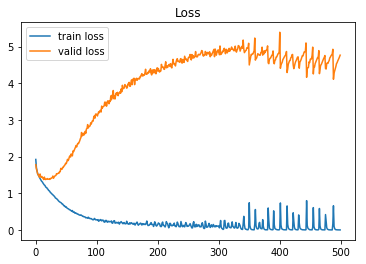

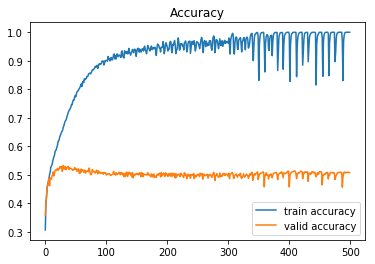

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()